In [1]:
import pandas as pd
import numpy as np

hf = pd.read_csv(
    "Google Form from GF_LLM_2024-05-19_zho.json (Responses) - Form Responses 1.csv"
)

In [2]:
# drop the first four columns
hf = hf.drop(hf.columns[[0, 1, 2, 3]], axis=1)
hf = hf.apply(lambda x: x.str.split(")").str[0] + ")")
hf = hf.apply(lambda x: x.str.replace(")", ""))
hf = hf.apply(lambda x: x.str.replace(" ", ""))

/var/folders/xr/lfv3bx8j69x4n2wzsd6ryvp40000gn/T/ipykernel_88738/2695076249.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hf = hf.apply(lambda x: x.str.replace(")", ""))


In [3]:
hf.head()
# convert to a list of lists

,Does the article indicate that the cause of the helicopter crash could be bad weather:,Does the article indicate that the cause of the helicopter crash could be maintenance challenges due to sanctions:,Does the article talk about people mourn the death of Raisi,Does the article talk about people express joy over the death of Raisi,In which tone does the article discuss the future of Iran after Raisi's death:,Does the article indicate that the cause of the helicopter crash could be bad weather:.1,Does the article indicate that the cause of the helicopter crash could be maintenance challenges due to sanctions:.1,Does the article talk about people mourn the death of Raisi.1,Does the article talk about people express joy over the death of Raisi.1,In which tone does the article discuss the future of Iran after Raisi's death:.1,...,Does the article indicate that the cause of the helicopter crash could be bad weather:.8,Does the article indicate that the cause of the helicopter crash could be maintenance challenges due to sanctions:.8,Does the article talk about people mourn the death of Raisi.8,Does the article talk about people express joy over the death of Raisi.8,In which tone does the article discuss the future of Iran after Raisi's death:.8,Does the article indicate that the cause of the helicopter crash could be bad weather:.9,Does the article indicate that the cause of the helicopter crash could be maintenance challenges due to sanctions:.9,Does the article talk about people mourn the death of Raisi.9,Does the article talk about people express joy over the death of Raisi.9,In which tone does the article discuss the future of Iran after Raisi's death:.9
0,B,B,A,B,B,A,A,B,B,D,...,B,B,B,B,D,A,B,A,B,D
1,B,B,B,B,B,B,A,B,B,B,...,B,B,B,B,B,A,B,A,B,B
2,B,B,A,B,B,A,A,B,B,D,...,B,B,B,B,D,A,A,A,B,D
3,B,B,B,B,B,A,A,B,B,D,...,B,B,B,B,B,A,B,A,B,B
4,B,B,A,B,B,A,A,B,B,D,...,B,B,B,B,B,A,B,A,B,D


In [25]:
# remove the column names
hf = hf.values.tolist()

In [31]:
type(hf[0])

list

In [29]:
import json

with open("LLM_2024-05-19_zho.json") as f:
    data = json.load(f)

# Initialize a list to store the extracted values
llm = []

# Iterate through the JSON objects to extract `post_LLM_answer`
for item in data:
    if "QnA" in item:
        for qna in item["QnA"]:
            if "post_LLM_answer" in qna:
                llm.append(qna["post_LLM_answer"])

# reshape the list
type(llm)

list

In [36]:
# compare each list of hf with llm and count the percentage of matches
# initialize a list to store the percentage of matches
matches = []
for i in range(len(hf)):
    matches.append(
        sum([1 for j in range(len(hf[i])) if hf[i][j] == llm[j]]) / len(hf[i])
    )

# convert the list to a dataframe
matches = pd.DataFrame(matches, columns=["match"])
matches.describe()

,match
count,8.00000
mean,0.81750
std,0.07285
min,0.70000
25%,0.77500
50%,0.81000
75%,0.88000
max,0.92000


Text(0, 0.5, 'Number of human responses')

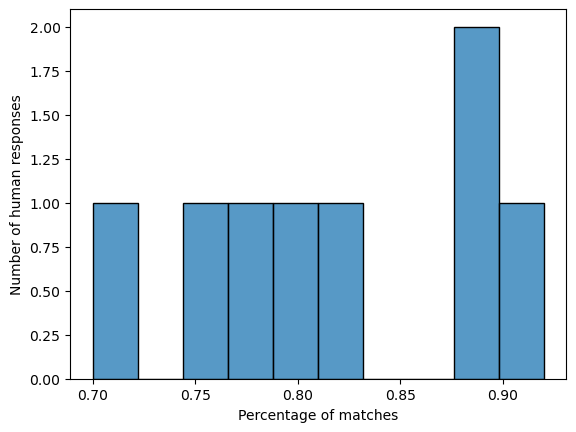

In [51]:
# plot the distribution of matches using seaborn

import seaborn as sns

sns.histplot(matches["match"], bins=10)

# set the x-axis label
plt.xlabel("Percentage of matches")
plt.ylabel("Number of human responses")

In [52]:
matches

,match
0,0.92
1,0.88
2,0.78
3,0.80
4,0.82
5,0.70
6,0.76
7,0.88
